✅ Supabase client successfully initialized.
Loaded 1000 records so far...
Loaded 2000 records so far...
Loaded 3000 records so far...
Loaded 4000 records so far...
Loaded 5000 records so far...
Loaded 5241 records so far...
✅ Loaded total of 5241 records from table 'product_data'.


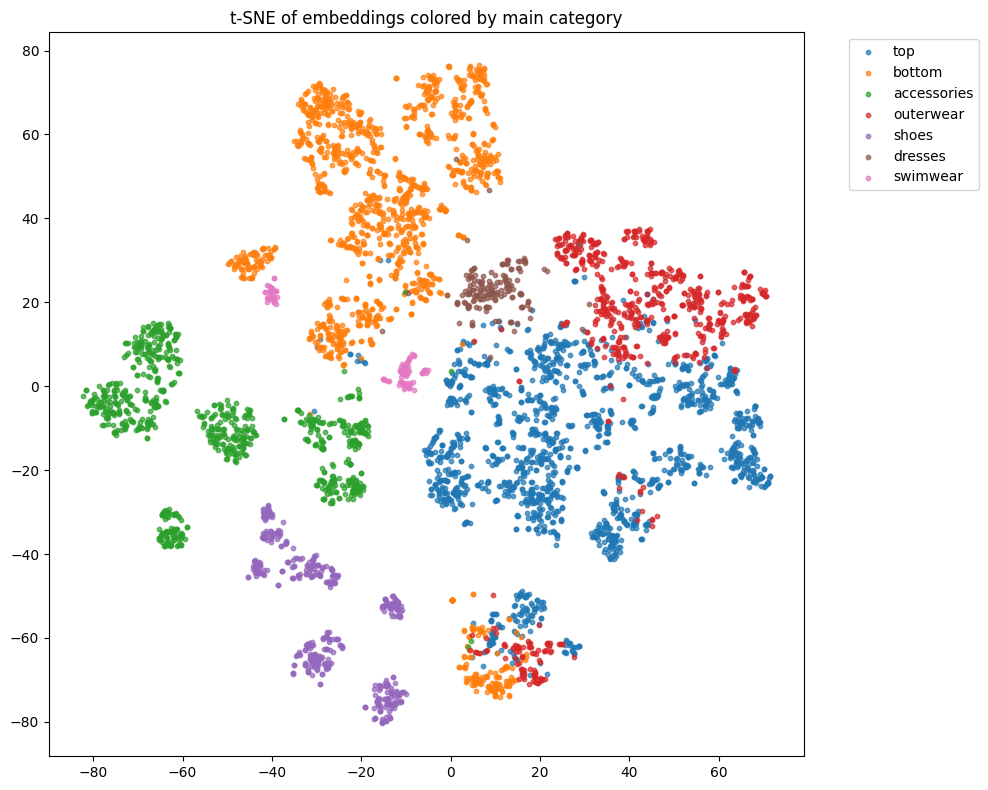

In [1]:
import supabase_queries as supa
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import ast

client = supa.setup_supabase_client()

df = supa.load_table(client, "product_data")

df["img_embedding_parsed"] = df["img_embedding"].apply(ast.literal_eval)

# Turn into a 2D NumPy array
embeddings = np.vstack(df["img_embedding_parsed"].to_numpy())

# Build embedding matrix
embeddings = np.vstack(df["img_embedding_parsed"].to_numpy())

# Optionally sample (t-SNE is slow & plot gets crowded)
sample_size = min(6000, embeddings.shape[0])
df_sample = df.iloc[:sample_size]
emb_sample = embeddings[:sample_size]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
points = tsne.fit_transform(emb_sample)

# Attach to dataframe for convenience
df_sample = df_sample.copy()
df_sample["tsne_x"] = points[:, 0]
df_sample["tsne_y"] = points[:, 1]


# Pick top N most frequent roles to show distinctly
N = 10
top_roles = df_sample["main_category"].value_counts().head(N).index

plt.figure(figsize=(10, 8))

for role in top_roles:
    mask = df_sample["main_category"] == role
    plt.scatter(
        df_sample.loc[mask, "tsne_x"],
        df_sample.loc[mask, "tsne_y"],
        s=10,
        label=str(role),
        alpha=0.7,
    )

# Optional: group the “other” less frequent roles
other_mask = ~df_sample["main_category"].isin(top_roles)
if other_mask.any():
    plt.scatter(
        df_sample.loc[other_mask, "tsne_x"],
        df_sample.loc[other_mask, "tsne_y"],
        s=5,
        alpha=0.3,
        label="OTHER",
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("t-SNE of embeddings colored by main category")
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
# --- 1. Define the coordinates for the Bottom Right ROI (Repeat from previous step) ---
pd.set_option('display.max_colwidth', None)
min_x, max_x = 0, 40
min_y, max_y = -80, -50

# --- 2. Create the filter mask ---
roi_mask = (
    (df_sample["tsne_x"] >= min_x) & (df_sample["tsne_x"] <= max_x) &
    (df_sample["tsne_y"] >= min_y) & (df_sample["tsne_y"] <= max_y)
)

# --- 3. Save the filtered data into suspicious_df ---
# We use .copy() to ensure 'suspicious_df' is an independent DataFrame
# and not just a view of 'df_sample'.
suspicious_df = df_sample[roi_mask].copy()

print(f"✅ Successfully created suspicious_df with {len(suspicious_df)} data points.")
print("\nFirst 5 entries of the suspicious_df:")
# print(suspicious_df['url'])

suspicious_urls = suspicious_df['url'].tolist()
write_url = '\n'.join(suspicious_urls)

with open("h&m_catalog/suspicious_urls.txt", "w", encoding="utf-8") as f:
    f.write(write_url)


# print(suspicious_df['id'])

✅ Successfully created suspicious_df with 358 data points.

First 5 entries of the suspicious_df:
